# Importing the data from a csv file

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame

df = pd.read_csv('C:/Users/david/OneDrive/Desktop/DCA/BP Article Data.csv')

df

,Year,S&P500 Stock Price,Dividend Yield,Inflation Rate,% change,Spending,Value of S&P Stock,Cash,Cash from Dividends
0,1914,8.37,0.050179,0.010,0.000000,NaN,NaN,NaN,NaN
1,1915,7.48,0.057487,0.010,-0.106332,NaN,NaN,NaN,NaN
2,1916,9.33,0.060021,0.079,0.247326,NaN,NaN,NaN,NaN
3,1917,9.57,0.072100,0.174,0.025723,NaN,NaN,NaN,NaN
4,1918,7.21,0.079057,0.180,-0.246604,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
97,2011,1282.62,0.020606,0.032,0.141548,NaN,NaN,NaN,NaN
98,2012,1300.58,0.024028,0.021,0.014003,NaN,NaN,NaN,NaN
99,2013,1480.40,0.023636,0.015,0.138261,NaN,NaN,NaN,NaN
100,2014,1822.36,0.021642,0.016,0.230992,NaN,NaN,NaN,NaN


# Iterating through each year in a 30 period
* Each period started with 900,000 dollars invested in the S&P500 Index and 100,000 dollars in cash
* If the the cash to stock ratio droped below 10% some of S&P500 stock was sold to rebalance
* The annual spending of 40,000 dollars/year (4% of the 1 million dollar starting amount) is adjusted annually for inflation

In [3]:
def four_perc(start):
    df.iat[start, 5] = 40000
    df.iat[start, 6] = 900000
    df.iat[start, 7] = 100000
    df.iat[start, 8] = 0

    
    for x in range(start + 1, start + 31):
        df.iat[x, 5] = df['Spending'][x - 1] * (1 + df['Inflation Rate'][x])
        df.iat[x, 8] = df['Value of S&P Stock'][x - 1] * df['Dividend Yield'][x]
        
        if df['Cash'][x - 1] + df['Cash from Dividends'][x] - df['Spending'][x] < 0.1 * (df['Value of S&P Stock'][x - 1] + df['Cash'][x - 1]):
            value_stock_sold = (0.1 * (df['Value of S&P Stock'][x - 1] + df['Cash'][x - 1])) - (df['Cash'][x - 1] + df['Cash from Dividends'][x] - df['Spending'][x])
            df.iat[x, 6] = df['Value of S&P Stock'][x - 1] * (1 + df['% change'][x]) - value_stock_sold
            df.iat[x, 7] = df['Cash'][x - 1] - df['Spending'][x] + df['Cash from Dividends'][x] + value_stock_sold
        else:
            df.iat[x, 6] = df['Value of S&P Stock'][x - 1] * (1 + df['% change'][x])
            df.iat[x, 7] = df['Cash'][x - 1] - df['Spending'][x] + df['Cash from Dividends'][x]
        
        if df['Value of S&P Stock'][x] < 0 or df['Cash'][x] < 0:
            return (df['Year'][start], df['Year'][x], df['Value of S&P Stock'][x], df['Cash'][x], 'Failure')
        
    return (df['Year'][start], df['Year'][x], df['Value of S&P Stock'][x], df['Cash'][x], 'Success')

# Creating a New Dataframe with the simulation results
* The results of each 30 year simulation show the Start Year, End Year, Portfolio Stock Value, Portfolio Cash Value, and if the portfolio did not go broke before the end of the 30 year period

In [4]:
results = []
for x in range(0, 72):
    print(four_perc(x))
    results.append(four_perc(x))

df_final = pd.DataFrame(np.array(results), columns = ['Start Date', 'End Date', 'Principal Stock Value', 'Cash Balance', 'Success'])

df_final.to_csv('C:/Users/david/OneDrive/Desktop/DCA/BP Art Simulations.csv')

df_final

(1914, 1944, 1098857.1567444943, 283177.5965754058, 'Success')
(1915, 1945, 1535041.7745125685, 534830.0351697701, 'Success')
(1916, 1946, 1446271.300233905, 154346.58195104063, 'Success')
(1917, 1947, 1323712.8363291738, 389710.9329385616, 'Success')
(1918, 1948, 1851178.9107081948, 1212793.9024095763, 'Success')
(1919, 1949, 1761019.1014207876, 1238019.2184470966, 'Success')
(1920, 1950, 1720498.294528866, 1221592.2734490035, 'Success')
(1921, 1951, 2684810.1168685905, 1671437.3708756273, 'Success')
(1922, 1952, 2982328.7569754417, 1593355.7643177672, 'Success')
(1923, 1953, 2647415.72192831, 1190502.1526634812, 'Success')
(1924, 1954, 2595016.980117747, 1291060.6027953336, 'Success')
(1925, 1955, 3020550.4794376497, 947400.1414765941, 'Success')
(1926, 1956, 3106010.7912980462, 651659.6362772824, 'Success')
(1927, 1957, 2991078.29761564, 568596.540629716, 'Success')
(1928, 1958, 1905300.8743203713, 247440.77410112126, 'Success')
(1929, 1959, 153709.92668225162, 18032.39576939919, 'S

,Start Date,End Date,Principal Stock Value,Cash Balance,Success
0,1914,1944,1098857.1567444943,283177.5965754058,Success
1,1915,1945,1535041.7745125685,534830.0351697701,Success
2,1916,1946,1446271.300233905,154346.58195104063,Success
3,1917,1947,1323712.8363291738,389710.9329385616,Success
4,1918,1948,1851178.9107081948,1212793.9024095763,Success
...,...,...,...,...,...
67,1981,2011,7497684.059860056,1382030.8695080495,Success
68,1982,2012,9106562.16732381,2002680.2193240758,Success
69,1983,2013,8041252.119142952,1447644.6389159642,Success
70,1984,2014,8378807.846306563,1169988.8965446507,Success


# Changing the Rate of Return of the 4 Failed Years to -100%

In [14]:
df_final['Return'] = ((df_final['Principal Stock Value'].astype(float) + df_final['Cash Balance'].astype(float) - 1000000) / 1000000) * 100

df.iat[51, 5] = -100
df.iat[52, 5] = -100
df.iat[54, 5] = -100
df.iat[55, 5] = -100

df_final['Portfolio Total'] = (df_final['Principal Stock Value'].astype(float) + df_final['Cash Balance'].astype(float))/1000000

df_final

,Start Date,End Date,Principal Stock Value,Cash Balance,Success,Return,Portfolio Total
0,1914,1944,1098857.1567444943,283177.5965754058,Success,38.203475,1.382035
1,1915,1945,1535041.7745125685,534830.0351697701,Success,106.987181,2.069872
2,1916,1946,1446271.300233905,154346.58195104063,Success,60.061788,1.600618
3,1917,1947,1323712.8363291738,389710.9329385616,Success,71.342377,1.713424
4,1918,1948,1851178.9107081948,1212793.9024095763,Success,206.397281,3.063973
...,...,...,...,...,...,...,...
67,1981,2011,7497684.059860056,1382030.8695080495,Success,787.971493,8.879715
68,1982,2012,9106562.16732381,2002680.2193240758,Success,1010.924239,11.109242
69,1983,2013,8041252.119142952,1447644.6389159642,Success,848.889676,9.488897
70,1984,2014,8378807.846306563,1169988.8965446507,Success,854.879674,9.548797


# Visualizing the Simulation results using Matplotlib and Seaborn

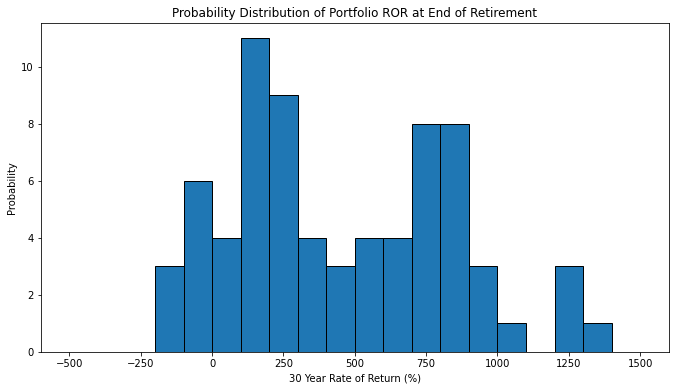

In [15]:
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
bins = []
for x in range(-500, 1600, 100):
    bins.append(x)
    
plt.hist(df_final['Return'], bins = bins, edgecolor = 'black')

plt.title('Probability Distribution of Portfolio ROR at End of Retirement')
plt.xlabel('30 Year Rate of Return (%)')
plt.ylabel('Probability')
plt.tight_layout()

plt.gcf().set_size_inches(10, 6)

<ipython-input-18-abc883d22cab>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().xaxis.set_major_locator(MultipleLocator(10))


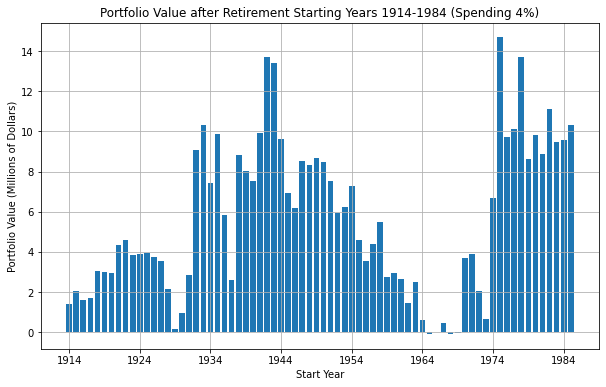

In [18]:
plt.bar(df_final['Start Date'], df_final['Portfolio Total'])

plt.gcf().set_size_inches(10, 6)

plt.title('Portfolio Value after Retirement Starting Years 1914-1984 (Spending 4%)')
plt.xlabel('Start Year')
plt.ylabel('Portfolio Value (Millions of Dollars)')
plt.grid()

plt.subplot().xaxis.set_major_locator(MultipleLocator(10))

[Text(0.5, 0, 'Portfolio Value (Millions of Dollars)'),
 Text(0.5, 1.0, 'Probability Distribution of Portfolio Value at End of Retirement (4% Spending)')]

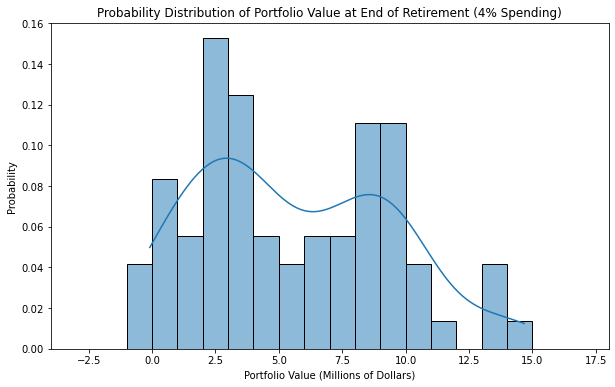

In [23]:
import seaborn as sns

bins = []
for x in range(-3, 18):
    bins.append(x)

fig_size = (10,6)
fig, ax = plt.subplots(figsize=fig_size)

sns.histplot(df_final['Portfolio Total'], bins = bins, stat="probability", ax = ax, kde = True).set(xlabel = 'Portfolio Value (Millions of Dollars)', title = 'Probability Distribution of Portfolio Value at End of Retirement (4% Spending)')


# Repeating the simulations using a 3% Annual Spending

In [30]:
def three_perc(start):
    df.iat[start, 5] = 30000
    df.iat[start, 6] = 900000
    df.iat[start, 7] = 100000
    df.iat[start, 8] = 0

    
    for x in range(start + 1, start + 31):
        df.iat[x, 5] = df['Spending'][x - 1] * (1 + df['Inflation Rate'][x])
        df.iat[x, 8] = df['Value of S&P Stock'][x - 1] * df['Dividend Yield'][x]
        
        if df['Cash'][x - 1] + df['Cash from Dividends'][x] - df['Spending'][x] < 0.1 * (df['Value of S&P Stock'][x - 1] + df['Cash'][x - 1]):
            value_stock_sold = (0.1 * (df['Value of S&P Stock'][x - 1] + df['Cash'][x - 1])) - (df['Cash'][x - 1] + df['Cash from Dividends'][x] - df['Spending'][x])
            df.iat[x, 6] = df['Value of S&P Stock'][x - 1] * (1 + df['% change'][x]) - value_stock_sold
            df.iat[x, 7] = df['Cash'][x - 1] - df['Spending'][x] + df['Cash from Dividends'][x] + value_stock_sold
        else:
            df.iat[x, 6] = df['Value of S&P Stock'][x - 1] * (1 + df['% change'][x])
            df.iat[x, 7] = df['Cash'][x - 1] - df['Spending'][x] + df['Cash from Dividends'][x]
        
        if df['Value of S&P Stock'][x] < 0 or df['Cash'][x] < 0:
            return (df['Year'][start], df['Year'][x], df['Value of S&P Stock'][x], df['Cash'][x], 'Failure')
        
    return (df['Year'][start], df['Year'][x], df['Value of S&P Stock'][x], df['Cash'][x], 'Success')

In [32]:
results = []
for x in range(0, 72):
    print(three_perc(x))
    results.append(three_perc(x))

df_three = pd.DataFrame(np.array(results), columns = ['Start Date', 'End Date', 'Principal Stock Value', 'Cash Balance', 'Success'])

df_three['Return'] = ((df_three['Principal Stock Value'].astype(float) + df_three['Cash Balance'].astype(float) - 1000000) / 1000000) * 100
df_three['Total Value'] = (df_three['Principal Stock Value'].astype(float) + df_three['Cash Balance'].astype(float))/1000000
                           
df_three

(1914, 1944, 1274193.543081606, 730197.9730591474, 'Success')
(1915, 1945, 1623128.335558102, 972933.5161950843, 'Success')
(1916, 1946, 1738263.6580971647, 608909.5443476384, 'Success')
(1917, 1947, 1430407.5166028189, 767004.7481445787, 'Success')
(1918, 1948, 1851178.9107081948, 1543209.8619645217, 'Success')
(1919, 1949, 1761019.1014207876, 1530104.4500399474, 'Success')
(1920, 1950, 1720498.294528866, 1476322.6501782953, 'Success')
(1921, 1951, 2684810.1168685905, 1960593.4890966774, 'Success')
(1922, 1952, 2982328.7569754417, 1907076.288968239, 'Success')
(1923, 1953, 2647415.72192831, 1504300.5825317556, 'Success')
(1924, 1954, 2595016.980117747, 1610593.4343277707, 'Success')
(1925, 1955, 3028355.380263001, 1264942.606993765, 'Success')
(1926, 1956, 3141106.710782894, 971362.1685209214, 'Success')
(1927, 1957, 3045260.2455469747, 901536.8425586638, 'Success')
(1928, 1958, 2102176.9150852673, 505844.55644275213, 'Success')
(1929, 1959, 1789447.16547389, 160896.37217985454, 'Succ

,Start Date,End Date,Principal Stock Value,Cash Balance,Success,Return,Total Value
0,1914,1944,1274193.543081606,730197.9730591474,Success,100.439152,2.004392
1,1915,1945,1623128.335558102,972933.5161950843,Success,159.606185,2.596062
2,1916,1946,1738263.6580971647,608909.5443476384,Success,134.717320,2.347173
3,1917,1947,1430407.5166028189,767004.7481445787,Success,119.741226,2.197412
4,1918,1948,1851178.9107081948,1543209.8619645217,Success,239.438877,3.394389
...,...,...,...,...,...,...,...
67,1981,2011,8295368.643467098,1844335.3462458183,Success,913.970399,10.139704
68,1982,2012,9675877.004776973,2417935.8902288782,Success,1109.381290,12.093813
69,1983,2013,8777374.618653873,1919294.4606949224,Success,969.666908,10.696669
70,1984,2014,9220305.22305142,1653046.5311865052,Success,987.335175,10.873352


# Repeating the same visualizations for 3% annual spending

<ipython-input-34-07c87e140d2f>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().xaxis.set_major_locator(MultipleLocator(10))


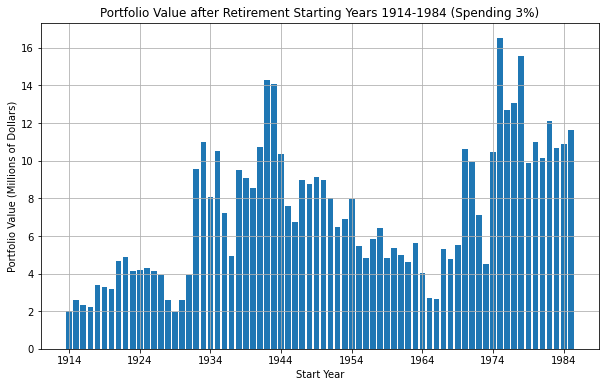

In [34]:
plt.bar(df_three['Start Date'], df_three['Total Value'])

plt.gcf().set_size_inches(10, 6)

plt.title('Portfolio Value after Retirement Starting Years 1914-1984 (Spending 3%)')
plt.xlabel('Start Year')
plt.ylabel('Portfolio Value (Millions of Dollars)')
plt.grid()

plt.subplot().xaxis.set_major_locator(MultipleLocator(10))

7.186744965271545


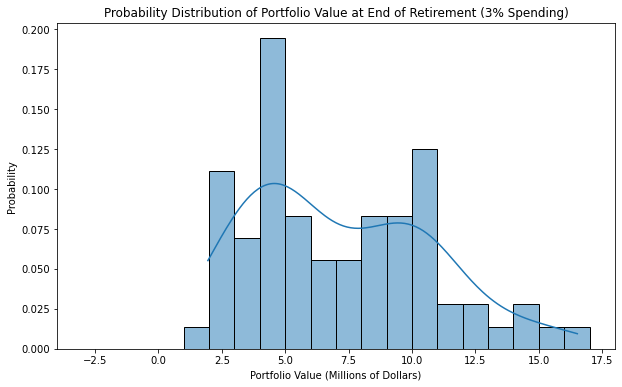

In [39]:
import seaborn as sns

bins = []
for x in range(-3, 18):
    bins.append(x)

fig_size = (10,6)
fig, ax = plt.subplots(figsize=fig_size)

sns.histplot(df_three['Total Value'], bins=bins, stat="probability", ax = ax, kde = True).set(xlabel = 'Portfolio Value (Millions of Dollars)', title = 'Probability Distribution of Portfolio Value at End of Retirement (3% Spending)')

print(df_three['Total Value'].mean())

# Ploting portfolio value throughout the simulation for 3 random years

In [41]:
portfolio1930 = []
portfolio1950 = []
portfolio1980 = []
Year = []

four_perc(16)

for x in range(16, 47):
    portfolio1930.append((df['Value of S&P Stock'][x] + df['Cash'][x])/1000000)

four_perc(36)

for x in range(36, 67):
    portfolio1950.append((df['Value of S&P Stock'][x] + df['Cash'][x])/1000000)

four_perc(66)

for x in range(66, 97):
    portfolio1980.append((df['Value of S&P Stock'][x] + df['Cash'][x])/1000000)

for x in range (0,31):
    Year.append(x)

<function matplotlib.pyplot.show(close=None, block=None)>

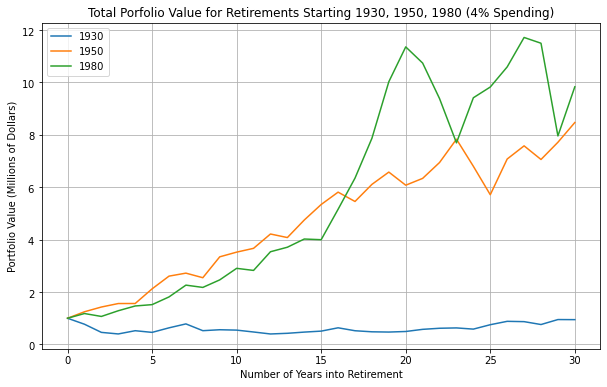

In [43]:
from matplotlib import rcParams
from matplotlib import ticker

rcParams['figure.figsize'] = 10 , 6

fig, ax = plt.subplots(1, 1)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
ax.yaxis.set_major_formatter(formatter) 

plt.plot(Year, portfolio1930, label = '1930')
plt.plot(Year, portfolio1950, label = '1950')
plt.plot(Year, portfolio1980, label = '1980')


plt.title('Total Porfolio Value for Retirements Starting 1930, 1950, 1980 (4% Spending)')
plt.xlabel('Number of Years into Retirement')
plt.ylabel('Portfolio Value (Millions of Dollars)')
plt.legend(loc =0)
plt.grid()

plt.show